In [1]:
# Classification
# Supervised Learning approach
# The target attribute is a categoritical value

In [2]:
# K- Nearest Neighbors
# - takes a bunch of points and uses them to label other points
# - classifying cases based on their similarity to other cases
# - cases that are near each other are said to be neighbors
# - based on similar cases with same class labels are near each other

# Algorithm
# 1 - Pick a value for K
# 2 - calcualte the distance of unknown case from all cases.
# 3 - select the K observations in the training data that are nearest to the unknown data point
# 4 - Predict the response of the unknown data point using the most popular response value from the K-nearest neighbors.

# for 2nd -> Dis(x1, x2) = Square(Total(x1i-x2i)^2) -> square((54-50)^2 + (190-200)^2 + (3-8)^2) = 11.87
# K = 1 -> overfitting, out-of-sampel data
# K = 20 -> Overly generalized -> Testing accuracy

# can also be used for regression

In [3]:
# Evaluation Metrics in Classification

# Jaccord Index
# - we have y and yhat, so intersection / union + (union - intersection)
# - y = 0,0,0,0,0,1,1,1,1,1 and yhat = 1,1,0,0,0,1,1,1,1,1
# - 8/10+10-8 = 0.66

# F1-score
# - Confusion Matrix
# - TP, FN, FP, TN
# - Precision = TP/TP+FP    -> Measure of Accuracy
# - Recall = TP/TP+FN       -> True Positive Rate
# - F1-score = 2*(prc * rec) / (prc + rec) -> 1 = High Accuracy

# Log loss
# - Measure performance of a classifier where the predicted output is a probability value between 0 and 1
# - Logloss = -1/n * total(y*log(yhat) + (1-y)*log(1-yhat))
# - lower logloss has better accuracy

In [4]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [5]:
df = pd.read_csv('teleCust1000t.csv')
df.head(2)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4


In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000288A47E6E08>]],
      dtype=object)

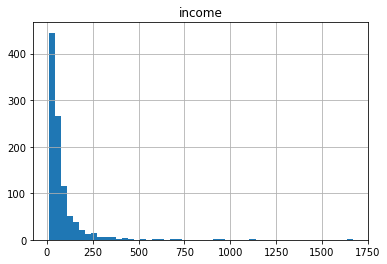

In [7]:
df.hist(column='income', bins=50)

In [8]:
columns = df.columns.tolist()
del columns[-1]
X = df[columns].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [9]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [10]:
# Normalizing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set : ", X_train.shape, y_train.shape)
print("Test set : ", X_test.shape, y_test.shape)

Train set :  (800, 11) (800,)
Test set :  (200, 11) (200,)


In [12]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [13]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [14]:
# Accuracy Evaluation
from sklearn import metrics

print("Train set Accuracy : ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy :  0.5475
Test set Accuracy :  0.32


In [15]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
The best accuracy was with 0.34 with k= 9


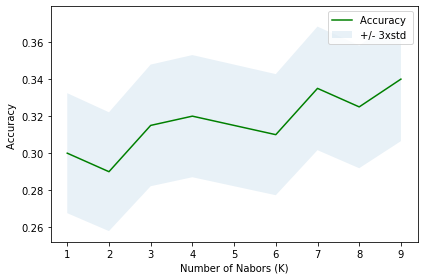

In [16]:
# Calculate Ks

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [17]:
# Decision Trees
# Each internal node corresponds to a test
# Each branch corresponds to a result of the test
# Each leaf node assigns a classification

# Algorithm
# 1 - Choose an attribute from your dataset
# 2 - Calculate the significance of attribute in splitting of data
# 3 - Split data based on the value of the best attribute
# 4 - Go to step 1

# Building Decision Trees
# Which attribute is the best ? To split data
# - Cholesterol -> High(Drug A or Drug B) , Normal (drug A or drug B). It's not good
# - Gender -> Female (Drug B might be), Male(no sufficient info). It's more significant
# --> Cholesterol or Male -> High = Drug A, Normal = Drug B
# Minimizing Impurity, calculated by Entropy of data.
# Entropy is randomness, uncertainty in the data
# The lower the Entropy, the less uniform the distribution, the purer the node.
# 1 DrugA, 7 DrugB => Entropy is Low. 0 DrugA, 8 DrugB => Entropy=0
# 3 DrugA, 5 DrugB => Entropy is High. 4 DrugA, 4DrugB => Entropy=1
# Entropy = -p(A)log(p(A)) - p(B)log(p(B))

# After splitting The tree with the higher Information Gain after splitting is the best.

# What is Infornmation Gain ?
# is information that can increase the level of certainty after splitting.
# Information Gain = Entropy before split - Weighed entropy after split
# Gain(g, Gender) = 0.94 - [7/14*0.985 + 7/14*0.592] = 0.151
# Gain(c, Cholesterol) = 0.94 - [(8/14)*0.811 + (6/14)*1.0] = 0.048

In [18]:
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('drug200.csv')
df.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC


In [19]:
df.shape

(200, 6)

In [20]:
columns = df.columns.tolist()
del columns[-1]
X = df[columns].values
y = df['Drug'].values
X[0:2]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093]], dtype=object)

In [21]:
# Changing categorical values to numerical values
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(df['Sex'].unique().tolist())
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(df['BP'].unique().tolist())
X[:,2] = le_BP.transform(X[:,2])

le_chol = preprocessing.LabelEncoder()
le_chol.fit(df['Cholesterol'].unique().tolist())
X[:,3] = le_chol.transform(X[:, 3])

X[0:2]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093]], dtype=object)

In [22]:
y[0:2]

array(['drugY', 'drugC'], dtype=object)

In [23]:
# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

In [24]:
# Modeling

drug_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drug_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
drug_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
pred_tree = drug_tree.predict(X_test)

In [27]:
print(pred_tree[0:5])
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


In [28]:
print("Decision Tree Accuracy : ", metrics.accuracy_score(y_test, pred_tree))

Decision Tree Accuracy :  0.9833333333333333


In [29]:
# Logistic Regression

# When is ?
# - If data is binary : 0/1, yes/no, true/false
# - If you need probabilistic results
# - When you need a linear decision boundary
# - you need to understand the impact of a feature

# P(y=0|x) = 1 - P(y=1|x)

# Logistic vs Linear

# Can't calculate probability in linear regression
# sigmoid(Q^T*X) = 1/1+ e^-(Q^T*X)

# Training Process
# 1 - Initialize Q
# 2 - Calculate yhat = sigmoid(Q^T*X)
# 3 - Compare the output of yhat with actual output of customer,y, and record it as error.
# 4 - Calculate the error for all. -> cost = J(Q)
# 5 - Change the Q to reduce the cost
# 6 - Go back to step 2.

# Training
# Change the weight -> Reduce the cost
# Cost function
# Cost(yhat, y) = 1/2 (sigmoid(Q^T*X) - y)^2 
# - square is used cuz of possibility of negative results
# - half of the cost function (1/2) for derivative process
# => J(Q) = 1/m * total(Cost(yhat, y))
# Better algorithm :
# - when y=1, -> J(Q) = -log(yhat)
# - when y=0, -> J(Q) = -log(1-yhat)
# => J(Q) = -1/m * total(y^i*log(yhat^i) + (1-y^i)log(1-yhat^i))

# Training Algorithm
# 1 - Initialize the parameters randomly
# 2 - Feed the cost function with training set, and calculate the error.
# 3 - Calculate the gradient of cost function
# 4 - Update weights with new values
# 5 - Go to step 2 until cost is small enough
# 6 - Predict the new one.


In [30]:
churn_df = pd.read_csv('ChurnData.csv')
churn_df.head(2)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0


In [31]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head(2)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1


In [32]:
X = churn_df[churn_df.columns.tolist()[:-1]].values
X[0:2]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.]])

In [33]:
y = churn_df['churn'].values
y[0:2]

array([1, 1])

In [34]:
#Normalizing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148]])

In [35]:
# Modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# C indicates inverse of regularization strength. Smaller is stronger
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [37]:
yhat_proba = LR.predict_proba(X_test)
yhat_proba

array([[0.58711718, 0.41288282],
       [0.56650898, 0.43349102],
       [0.5313329 , 0.4686671 ],
       [0.66722528, 0.33277472],
       [0.53481231, 0.46518769],
       [0.59508358, 0.40491642],
       [0.49995014, 0.50004986],
       [0.56532893, 0.43467107],
       [0.39939231, 0.60060769],
       [0.59368426, 0.40631574],
       [0.54844546, 0.45155454],
       [0.58957413, 0.41042587],
       [0.52439771, 0.47560229],
       [0.41344893, 0.58655107],
       [0.68930146, 0.31069854],
       [0.51576247, 0.48423753],
       [0.4969602 , 0.5030398 ],
       [0.46038301, 0.53961699],
       [0.47010467, 0.52989533],
       [0.57170621, 0.42829379],
       [0.50781873, 0.49218127],
       [0.49802608, 0.50197392],
       [0.66938224, 0.33061776],
       [0.49625351, 0.50374649],
       [0.47635919, 0.52364081],
       [0.73040145, 0.26959855],
       [0.45111513, 0.54888487],
       [0.49187403, 0.50812597],
       [0.4927476 , 0.5072524 ],
       [0.73618723, 0.26381277],
       [0.

In [38]:
# Evaluation
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.36363636363636365

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 8  7]
 [ 7 18]]


Confusion matrix, without normalization
[[ 8  7]
 [ 7 18]]


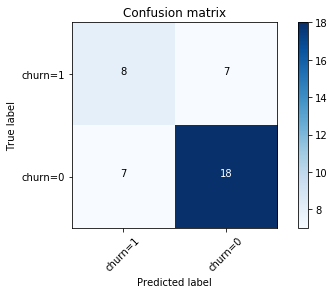

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [41]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



In [42]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_proba)

0.6155809757244557

In [43]:
# Support Vector Machine

# classifies cases by finding a seperator
# 1 - mapping data to a high-dimensional feature space
# 2 - finding a seperator

# Data transformation
# Mapping data into higher dimension space is called Kernelling
# - Linear, polynomial, RBF, Sigmoid -> Kernel functions

# Using SVM to find the hyperplane
# - Bigger margin between classes

# advantages : Accurate in high dimensional spaces, Memory efficient
# disadvantages : Prone to over-fitting, No probability estimation, Small datasets

# SVM applications : image recognition, text category assignment, detecting spam, sentiment analysis
# - Gene expression Classification, Regression, outlier detection and clustering.

In [77]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.head(2)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


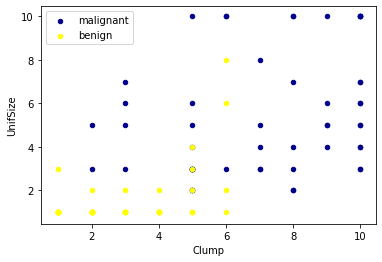

In [78]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [79]:
# BareNuc field is Object so we delete other values
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int64')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [80]:
X = cell_df[cell_df.columns.tolist()[1:-1]].values
X[0:2]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1]], dtype=int64)

In [81]:
y = cell_df['Class'].values
y[0:2]

array([2, 2], dtype=int64)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


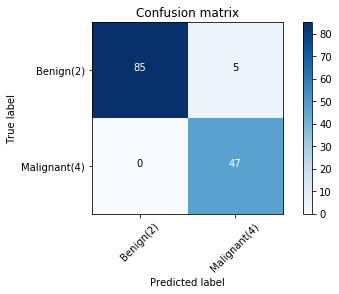

In [83]:
#Evaluation 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [84]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9639038982104676

In [85]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

c:\users\metin\desktop\workspace\pythonenvs\ibmds\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9635036496350365